# 비정상 절차서 23-03 : 1차기기 냉각수(CCW)계통으로 누설 시

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/논문/ISOFIC2021/ISOFIC 논문 준비/new_db_30mal/ab23_03_40.pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 4:deque(maxlen=5), 5:deque(maxlen=5)}

Report

파단 크기에 따라 다른 증상이 확인됨.

## 2.0 경보 및 증상

### 2.1 모든 원자로냉각재계통 누설 시 공통적 증상

### 2.1.1 PZR 수위 또는 압력 감소 → 만족

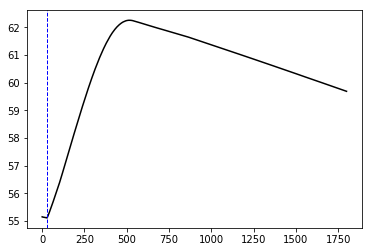

In [2]:
# ZINST63 : 가압기 수위
plt.plot(db['ZINST63'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

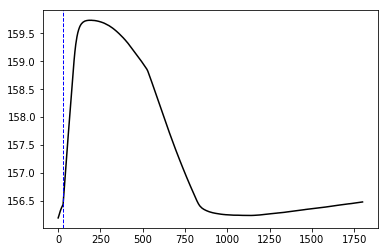

In [3]:
# ZINST58 : 가압기 압력
plt.plot(db['ZINST58'], color='k') # -> 압력 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [4]:
pzr_level, pzr_pres = [], []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZINST63'][i])
        sym_ch[1].append(db['ZINST58'][i])
        if len(sym_ch[0]) == 5:
            if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2] > sym_ch[0][3] > sym_ch[0][4]:
                pzr_level.append(i+1)
    #             print(f'수위 감소 증상 만족 시간 : {i+1}초')
        if len(sym_ch[1]) == 5:
            if sym_ch[1][0] > sym_ch[1][1] > sym_ch[1][2] > sym_ch[1][3] > sym_ch[1][4]:
                pzr_pres.append(i+1)
#             print(f'압력 감소 증상 만족 시간 : {i+1}초')
print(f'최초 수위 감소 증상 만족 시간 : {pzr_level[0]}초')
print(f'최초 압력 감소 증상 만족 시간 : {pzr_pres[0]}초')

최초 수위 감소 증상 만족 시간 : 524초
최초 압력 감소 증상 만족 시간 : 217초


Report
1. 단순 감소 표현으로 규칙을 생성할 경우, 고장 주입 전 증상이 만족하는 현상
2. 이를 해결하기 위해 고장 주입 이후 증상 평가를 수행
3. 2의 문제점으로 비정상 발생 이후 증상 평가를 해야한다는 강제사항이 발생
결론: 보여주기식으로는 2번으로 해도 상관없으나, 해당 부분은 고민할 필요성이 있다고 판단됨.
개선점: 추가적인 개선 방안으로 이동평균선의 활용이 검토됨. 추후 활용하여 판단할 예정임.

### 2.1.2 VCT 수위 감소 또는 보충횟수 증가 → 만족

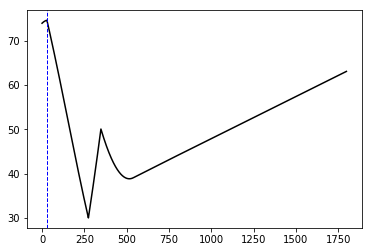

In [5]:
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [6]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['ZVCT'][i])
        if len(sym_ch[2]) == 5:
            if sym_ch[2][0] > sym_ch[2][1] > sym_ch[2][2] > sym_ch[2][3] > sym_ch[2][4]:
                vct_level.append(i+1)
print(f'최초 VCT 수위 감소 증상 만족 시간 : {vct_level[0]}초')

최초 VCT 수위 감소 증상 만족 시간 : 35초


Report

VCT를 통한 보충수 유입 횟수의 산정이 어렵기 때문에 "VCT 수위 감소"만을 확인

### 2.1.3 발전소 제반요소의 변동이 없는 상태에서 충전유량의 증가 → 만족

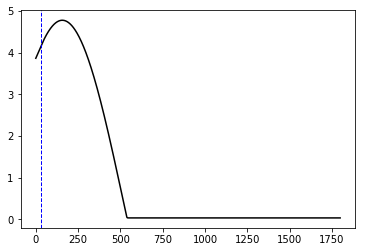

In [7]:
# WCHGNO : 충전유량
plt.plot(db['WCHGNO'], color='k') # -> 충전유량 증가 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [8]:
ch_flow = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['WCHGNO'][i])
        if len(sym_ch[num]) == 5:
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4]:
                ch_flow.append(i+1)
print(f'최초 충전유량 증가 증상 만족 시간 : {ch_flow[0]}초')

최초 충전유량 증가 증상 만족 시간 : 35초


### 2.2 CCW Hx 출구헤더에 설치된 방사선감시기의 지시치 증가 및 경보 → 미구현

Report

CNS에 CCW Hx 출구헤더 방사선감시기가 미구현 상태이므로 해당 증상은 확인할 수 없음.

또한, 격납용기 방사선 준위 또한 일정하게 유지되므로 해당 증상에 대한 구현은 불가능함.

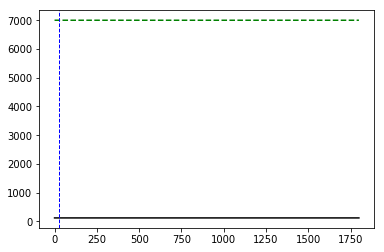

In [9]:
# DCTMT : 격납용기 방사선, CRADHI : 고방사선 경보 설정치
plt.plot(db['DCTMT'], color='k') # -> 1차측 방사선 일정
plt.plot(db['CRADHI'], color='g', linestyle='--') # -> 1차측 방사선 경보 미발생
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [10]:
fir_rad = []
num = 4 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['DCTMT'][i])
        if len(sym_ch[num]) == 5:
            if (sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4]) and (db['DCTMT'][i] > db['CRADHI'][i]):
                fir_rad.append(i+1)
print(f'최초 1차측 방사선준위 증가 및 경보 증상 만족 시간 : {fir_rad[0]}초')

IndexError: list index out of range

### 2.3 CCW 완충탱크의 수위 증가 → 미구현

Report

CCW 완충탱크 미구현에 따라 해당 증상은 확인할 수 없음.

### 2.4 RCP 열방벽 열교환기 누설 시 RCP 열방벽 열교환기 출구온도 증가 및 CCW 유량 증가 경보 발생 → 미구현

Report

CCW 유량 및 RCP 열교환기 출구온도 미구현에 따라 해당 증상은 확인할 수 없음.

## 3.0 자동동작사항

### 3.1 RCP 열방벽 열교환기 출구 ‘고’ 유량(EG-FI435, 433, 431 : 3.78 ℓ/s) 시 해당 RCP 열방벽 열교환기 출구밸브 자동 닫힘 → 미구현

Report

RCP 열방벽 열교환기 및 관련 밸브 미구현에 따라 해당 증상은 확인할 수 없음.

### 3.2 RCP 열방벽 열교환기 출구 밸브(EG-FV435, 433, 431) 닫힘으로 인해 RCP 열방벽 열교환기 압력보호밸브(EG-PSV434, 432, 430) 동작으로 격납용기 배수조 수위 증가 → 미구현

Report

RCP 열방벽 열교환기 및 관련 밸브 미구현에 따라 해당 증상은 확인할 수 없음.

### 3.3 RCP 열방벽 열교환기 누설로 인하여 1차기기 냉각수(CCW) 공통회수관의 유량전송기(EG-FT337) ‘고‘ 유량(13.5 ℓ/s) 시 격납용기 내부 CCW 차단밸브(EG-HV337) 자동 닫힘 → 미구현

Report

RCP 열방벽 열교환기 및 관련 밸브 미구현에 따라 해당 증상은 확인할 수 없음.

### 3.4 가압기 수위가 17% 이하로 감소할 경우 유출수 밸브(BG-HV001/002/003,BG-LV459/460)가 자동으로 차단된다. → 불만족

Report

절차서에 명시된 모든 유출수 밸브가 차단되었을 경우, 증상 만족으로 봄. (전체 4개 밸브)

또한, 가압기 수위 17% 이하도 규칙에 포함됨.

해당되는 17%가 설정치로 판단되나, 추후 어떤 설정치인지 파악할 필요 있음. (아마 Low setpoint or trip setpoint로 추정됨)

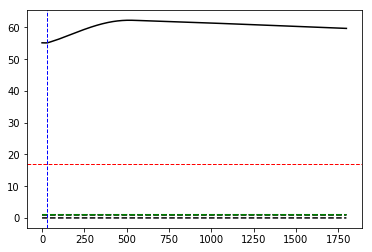

In [17]:
# ZINST63 : 가압기 수위, BHV1 : HV1 (45), BHV2 : HV2 (60), BHV3 : HV3 (75)
# BLV459 : 유출수 격리밸브
plt.plot(db['ZINST63'], color='k') # 가압기 수위 감소
plt.plot(db['BHV1'], color='k', linestyle='--')
plt.plot(db['BHV2'], color='k', linestyle='--')
plt.plot(db['BHV3'], color='k', linestyle='--')
plt.plot(db['BLV459'], color='g', linestyle='--')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
hline = plt.axhline(17, color='r', linestyle='--', linewidth=1) # 가압기 수위 17% 표현

In [18]:
auto1 = []
for i in range(len(db)):
    if i > 29:
        if (db['ZINST63'][i] < 17) and (db['BHV1'][i] == 0) and (db['BHV2'][i] == 0) and (db['BHV3'][i] == 0) and (db['BLV459'][i] == 0):
            auto1.append(i+1)
if len(auto1) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수밸브 차단 증상 만족 시간 : {auto1[0]}초')

증상을 만족하지 못했습니다.


### 3.5 RCS 압력이 136.78kg/cm2 이하가 되면 원자로 트립이 발생한다. → 불만족

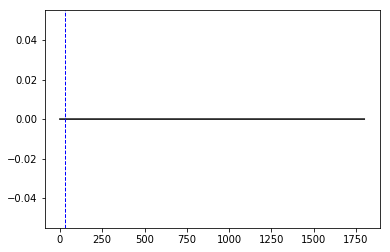

In [19]:
# KLAMPO9 : 원자로 트립 신호
plt.plot(db['KLAMPO9'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [20]:
auto3 = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO9'][i] == 1:
            auto3.append(i+1)
if len(auto3) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 원자로 트립 증상 만족 시간 : {auto3[0]}초')

증상을 만족하지 못했습니다.


### 3.6 RCS 압력이 126.57kg/cm2 이하가 되면 안전주입이 발생한다. → 불만족

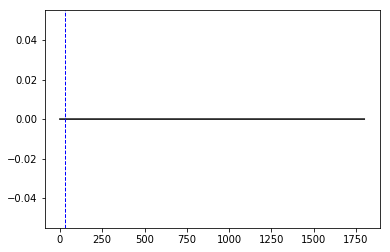

In [21]:
# KLAMPO6 : 안전주입 발생 신호
plt.plot(db['KLAMPO6'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [22]:
auto4 = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO6'][i] == 1:
            auto4.append(i+1)
if len(auto4) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 안전주입 증상 만족 시간 : {auto4[0]}초')

증상을 만족하지 못했습니다.


## 4.0 긴급 조치사항

### 4.1 가압기 수위유지를 위해 필요할 경우 충전펌프를 추가 기동한다.

### 4.2 가압기 압력유지를 위해 필요할 경우 가압기 보조전열기를 수동 'ON' 한다.

### 4.3 충전펌프 추가기동 및 가압기 전열기 수동투입을 해도 가압기의 수위 및 압력을 유지할 수 없으면 원자로를 수동으로 정지시키고 비상-0(원자로 트립 또는 안전주입) 운전절차에 따른다.

### 4.4 정기-발-13(원자로냉각재계통 누설량 평형정검) 점검 절차서에 따라 원자로 냉각재 누설율을 계산한다.

### 4.5 누설개소를 확인하고 확인된 누설개소에 대하여 후속조치사항을 수행한다.

## 5.0 후속 조치사항